<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

<div class="alert alert-block alert-info">
    <h2 align="center">Importing Libraries</h2>
</div>

In [1]:
import pandas as pd
import seaborn as sns

<div class="alert alert-block alert-info">
    <h2 align="center">Load and prepare data</h2>
</div>

In [2]:
#### Reading googleplaystore.csv file
df = pd.read_csv('googleplaystore.csv')

In [3]:
#### Checking the shape of the data. It has 13 columns and 10841 rows
df.shape

(10841, 13)

In [4]:
#### Printing 5 random rows of data
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10608,Florida map,TRAVEL_AND_LOCAL,NaN,11,3.4M,"5,000+",Free,0,Everyone,Travel & Local,"May 15, 2016",0.0.7,4.0 and up
2073,Super School: Educational Kids Games & Rhymes,FAMILY,4.5,1791,56M,"500,000+",Free,0,Everyone,Education;Education,"June 2, 2018",5.3.11,5.0 and up
9965,EV Real Estate Search,LIFESTYLE,4.1,88,20M,"5,000+",Free,0,Everyone,Lifestyle,"July 13, 2018",5.600.49,4.0.3 and up
6457,Basket Manager 2018 Pro,SPORTS,3.7,84,6.3M,"1,000+",Paid,$2.99,Everyone,Sports,"April 17, 2018",3.7,4.4 and up
8992,DW Audio,FAMILY,4.9,38,5.0M,"1,000+",Free,0,Everyone,Education,"June 16, 2017",0.9.0,4.1 and up


In [5]:
#### Different columns present in data
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
#### Data has 13 columns and 10841 rows
#### Columns Rating, Type, Content Rating, Current Ver and Android Ver have null data in them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<div class="alert alert-block alert-info">
    <h3 align="center">18 percents of App are in FAMILY Category and 10 percent are in GAME</h3>
</div>

In [7]:
df['Category'].value_counts(normalize=True) * 100

FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903
COMMUNICATION           3.569781
SPORTS                  3.542109
LIFESTYLE               3.523660
FINANCE                 3.376072
HEALTH_AND_FITNESS      3.145466
PHOTOGRAPHY             3.090121
SOCIAL                  2.721151
NEWS_AND_MAGAZINES      2.610460
SHOPPING                2.398303
TRAVEL_AND_LOCAL        2.379854
DATING                  2.158472
BOOKS_AND_REFERENCE     2.130800
VIDEO_PLAYERS           1.614242
EDUCATION               1.438982
ENTERTAINMENT           1.374412
MAPS_AND_NAVIGATION     1.263721
FOOD_AND_DRINK          1.171479
HOUSE_AND_HOME          0.811733
LIBRARIES_AND_DEMO      0.784061
AUTO_AND_VEHICLES       0.784061
WEATHER                 0.756388
ART_AND_DESIGN          0.599576
EVENTS                  0.590351
COMICS    

<div class="alert alert-block alert-info">
    <h3 align="center">Rating</h3>
    <h3 align="center">Changing 19.0 value and all null values to 0</h3>
</div>

In [8]:
df.loc[df.Rating.isnull(),'Rating'] = 0
df.loc[df.Rating == 19.0,'Rating'] = 0
df.Rating.value_counts()

0.0    1475
4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

<div class="alert alert-block alert-info">
    <h3 align="center">Reviews</h3>
    <h3 align="center">Changing Reviews columns to int64</h3>
</div>

In [9]:
df.loc[df.Reviews.str.contains('.0M'),'Reviews'] = df.loc[df.Reviews.str.contains('.0M'),'Reviews'].str.replace('.0M','')
df = df.astype({'Reviews' : 'int64'})
df.Reviews.value_counts()

<ipython-input-9-4e941b14560d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df.Reviews.str.contains('.0M'),'Reviews'] = df.loc[df.Reviews.str.contains('.0M'),'Reviews'].str.replace('.0M','')


0           596
1           272
2           214
3           176
4           137
           ... 
4027          1
137144        1
12215         1
17014705      1
315390        1
Name: Reviews, Length: 6001, dtype: int64

<div class="alert alert-block alert-info">
    <h3 align="center">Installs</h3>
    <h3 align="center">Free has no meaning so changing it to 0</h3>
    <h3 align="center">changing data type to int64 for statistic purposes</h3>
</div>

In [11]:
df.loc[df.Installs == 'Free','Installs'] = 0
df.loc[df.Installs.isnull(),'Installs'] = '0'
df.loc[:,'Installs'] = df.loc[:,'Installs'].str.replace('+','')
df.loc[:,'Installs'] = df.loc[:,'Installs'].str.replace(',','')
df = df.astype({'Installs' : 'int64'})
df['Installs'].value_counts()


<ipython-input-11-cc8dcc13c637>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.loc[:,'Installs'] = df.loc[:,'Installs'].str.replace('+','')


1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: Installs, dtype: int64

<div class="alert alert-block alert-info">
    <h3 align="center">Type</h3>
    <h3 align="center">93 percent of Apps were free</h3>
    <h3 align="center">0 has no meaning so changing it to free</h3>
</div>

In [12]:
df.loc[df.Type == '0','Type'] = 'Free'
df.loc[df.Type.isnull(),'Type'] = 'Free'
df['Type'].value_counts(normalize=True) * 100

Free    92.620607
Paid     7.379393
Name: Type, dtype: float64

<div class="alert alert-block alert-info">
    <h3 align="center">Price</h3>
    <h3 align="center">Changing price columns to float64 for statistic purposes</h3>
    <h3 align="center">Changing Everyone value to 0</h3>
</div>

In [13]:
df.loc[:,'Price'] = df.loc[:,'Price'].str.replace('$','')
df.loc[df.Price == 'Everyone' , 'Price'] = '0'
df = df.astype({'Price' : 'float64'})
df.Price.unique()

<ipython-input-13-59a2bab1a9b7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.loc[:,'Price'] = df.loc[:,'Price'].str.replace('$','')


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

<div class="alert alert-block alert-info">
    <h3 align="center">Content Rating</h3>
    <h3 align="center">80 percent of Apps were for Everyone</h3>
    <h3 align="center">Change NaN values to Unrated</h3>
</div>

In [14]:
df.loc[df['Content Rating'].isnull(),'Content Rating'] = 'Unrated'
df['Content Rating'].value_counts(normalize=True) * 100


Everyone           80.380039
Teen               11.142883
Mature 17+          4.602896
Everyone 10+        3.818836
Unrated             0.027673
Adults only 18+     0.027673
Name: Content Rating, dtype: float64

<div class="alert alert-block alert-info">
    <h2 align="center">EDA (Use Pandas)</h2>
</div>

<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>Rating mean is close to it's max, meaning most of the Apps were reviewed favourably</li>
        <li>There is no correlation between numbers of installs and reviews</li>
        <li>Due to the huge number of free Apps, price data is skewed towards 0</li>
    </ul>
</div>

In [15]:
df.describe()

,Rating,Reviews,Installs,Price
count,10841.000000,1.084100e+04,1.084100e+04,10841.000000
mean,3.621437,4.441119e+05,1.546291e+07,1.027273
std,1.514893,2.927629e+06,8.502557e+07,15.948971
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>Free Apps are the favoured form of relesing</li>
        <li>More than 90 percent of Apps in every content rating were free</li>
    </ul>
</div>

In [16]:
pd.crosstab(df.Type,df['Content Rating'],normalize='columns')

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,1.0,0.920243,0.92029,0.95992,0.956954,1.0
Paid,0.0,0.079757,0.07971,0.04008,0.043046,0.0


<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>There is not much difference in ratings between free and paid apps</li>
        <li>There are huge difference between numbers of reviews and installs in free and paid apps</li>
    </ul>
</div>

In [17]:
df.groupby('Type').mean().reset_index()

,Type,Rating,Reviews,Installs,Price
0,Free,3.635046,478565.755004,1.668763e+07,0.000000
1,Paid,3.450625,11673.312500,9.119510e+04,13.920837


In [18]:
df.groupby('Content Rating').mean().reset_index()

,Content Rating,Rating,Reviews,Installs,Price
0,Adults only 18+,4.300000,2.711600e+04,6.666667e+05,0.000000
1,Everyone,3.564712,3.215340e+05,1.310037e+07,1.171173
2,Everyone 10+,4.082367,1.652167e+06,3.196590e+07,0.378478
3,Mature 17+,3.809419,3.951233e+05,1.107112e+07,0.236673
4,Teen,3.798924,9.366918e+05,2.873870e+07,0.543278
5,Unrated,1.366667,3.966667e+02,1.683333e+04,0.000000


In [19]:
df.groupby(['Type','Content Rating']).mean().reset_index()

,Type,Content Rating,Rating,Reviews,Installs,Price
0,Free,Adults only 18+,4.300000,2.711600e+04,6.666667e+05,0.000000
1,Free,Everyone,3.581494,3.490451e+05,1.423185e+07,0.000000
2,Free,Everyone 10+,4.061417,1.781766e+06,3.467026e+07,0.000000
3,Free,Mature 17+,3.811482,4.099838e+05,1.150962e+07,0.000000
4,Free,Teen,3.797059,9.783465e+05,3.002661e+07,0.000000
5,Free,Unrated,1.366667,3.966667e+02,1.683333e+04,0.000000
6,Paid,Everyone,3.371079,4.107640e+03,4.528364e+04,14.684317
7,Paid,Everyone 10+,4.324242,1.558885e+05,7.428636e+05,4.748182
8,Paid,Mature 17+,3.760000,3.921545e+04,5.691260e+05,5.905000
9,Paid,Teen,3.840385,1.067715e+04,1.074410e+05,12.620769


<div class="alert alert-block alert-info">
    <h2 align="center">Visualization with seaborn</h2>
</div>

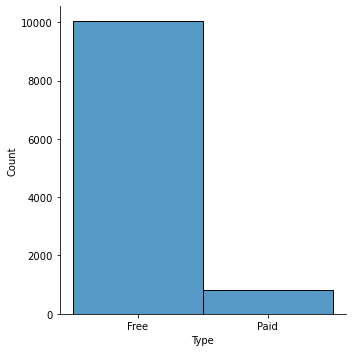

In [20]:
sns.displot(df,x='Type')

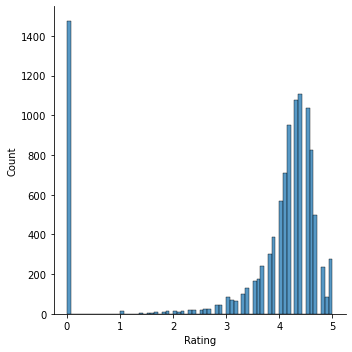

In [21]:
sns.displot(df,x='Rating')

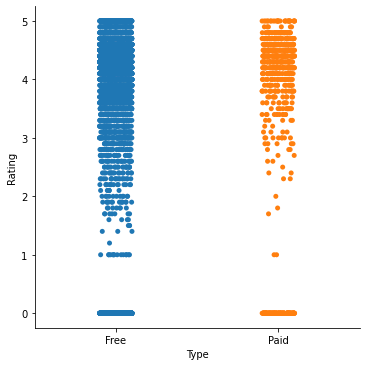

In [22]:
sns.catplot(x='Type',y='Rating',data=df)

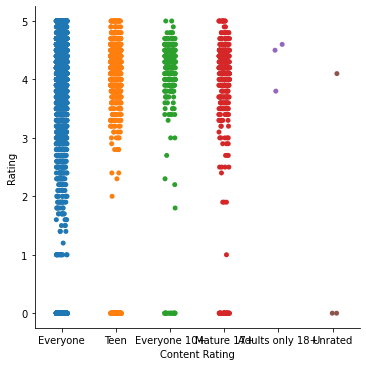

In [23]:
sns.catplot(x='Content Rating',y='Rating',data=df)